In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pcmdpy as ppy
import pandas as pd
import easydarkfigs
%matplotlib inline

In [2]:
%set_darkfigdir figures_dark/
%set_lightfigdir figures/

In [3]:
%%time
from results import models, results, pcmds, data, radii_am, radii_kpc, dmods, regions
import results as rr

CPU times: user 20.9 ms, sys: 6.78 ms, total: 27.7 ms
Wall time: 30.4 ms


In [4]:
%%time
for i in range(1, 9):
    if i == 6:
        continue
    print(i)
    rr.load_model(i, all_quads=(i==7))

1
M87
M87v2
M49
NGC3377
NGC4993
M31 Bulge
M51
2
M87
M87v2
M49
NGC3377
NGC4993
M31 Bulge
M51
3
M87
M87v2
M49
NGC3377
NGC4993
M31 Bulge
M51
4
M87
M87v2
M49
NGC3377
NGC4993
M31 Bulge
M51
Skipping M51_a_m4
Skipping M51_b_m4
Skipping M51_c_m4
Skipping M51_d_m4
Skipping M51_e_m4
5
M87
M87v2
M49
NGC3377
NGC4993
M31 Bulge
M51
Skipping M51_a_m5
Skipping M51_b_m5
Skipping M51_c_m5
Skipping M51_d_m5
Skipping M51_e_m5
7
M87
M87v2
M49
NGC3377
NGC4993
M31 Bulge
M31 Disk
M51
8
M87
Skipping M87_a1_m8
Skipping M87_b1_m8
Skipping M87_c1_m8
M87v2
M49
NGC3377
NGC4993
M31 Bulge
Skipping M31_e_m8
Skipping M31_d_m8
Skipping M31_c_m8
Skipping M31_b_m8
Skipping M31_a_m8
M51
Skipping M51_a_m8
Skipping M51_b_m8
Skipping M51_c_m8
Skipping M51_d_m8
Skipping M51_e_m8
CPU times: user 2min 35s, sys: 3.21 s, total: 2min 38s
Wall time: 2min 40s


In [5]:
results['DF2_ssp'] = ppy.results.ResultsPlotter('results/DF2_m5.csv', live_file='results/DF2_m5_live.csv')
data['DF2_ssp'] = np.loadtxt('../data/DF2/pcmds/DF2_I_VI_1.pcmd', unpack=True)

In [6]:
sfhmodel = ppy.sfhmodels.NonParam()  # Fully non-parametric model
# Use 3 SFH bins from 9.5-9.75, 9.75-10.0, 10.0-10.2
sfhmodel.update_sfh_edges(np.array([9.5, 9.75, 10.0, 10.2]))
# Isochrones to use are 9.1, 9.3, 9.5, 9.7, 9.9, 10.1
sfhmodel.update_edges(np.arange(9.0, 10.3, 0.1))
m = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(),
    ppy.dustmodels.SingleDust(),
    sfhmodel,
    ppy.distancemodels.VariableDistance()
)
results['DF2_np'] = ppy.results.ResultsPlotter('results/DF2_m4.csv', live_file='results/DF2_m4_live.csv', gal_model=m.copy())
data['DF2_np'] = data['DF2_ssp']

In [36]:
rr.load_model(7, all_quads=True)

M87
M87v2
M49
NGC3377
NGC4993
M31 Bulge
M31 Disk
M51


In [37]:
rr.load_model(8, all_quads=False)

M87
Skipping M87_a1_m8
Skipping M87_b1_m8
Skipping M87_c1_m8
M87v2
M49
NGC3377
NGC4993
M31 Bulge
Skipping M31_e_m8
Skipping M31_d_m8
Skipping M31_c_m8
Skipping M31_b_m8
Skipping M31_a_m8
M51
Skipping M51_a_m8
Skipping M51_b_m8
Skipping M51_c_m8
Skipping M51_d_m8
Skipping M51_e_m8


In [7]:
%%time
from drivers import filters, iso_models, drivers, sky

Loading Isochrone Models
CPU times: user 45.6 s, sys: 10.6 s, total: 56.2 s
Wall time: 57.4 s


GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.GPU acceleration not available. Continuing without.

In [35]:
def many_pcmd_compares(keys, gain=1.0, residuals=False, axes=None):
    n = len(keys)
    if axes is None:
        fig, axes = plt.subplots(ncols=n, figsize=(5*(n+1), 6))
    for i, k in enumerate(keys):
        g = k.split('_')[0]
        a = axes[i]
        ppy.plotting.plot_pcmd_contours(data[k], color='k', alpha=0.8, ls=':', label='Data', ax=a)
        if k not in pcmds:
            print(f'Modeling best fit for {k}')
            pcmds[k], _ = drivers[g].simulate(results[k].best_model, 128, sky_noise=sky[g], dither=False, gain=gain, mag_system=('ab' if g=='M31' else 'vega'), dark_per_sec=(0.0127 if (('m8' in k)) else 0.0))
        ppy.plotting.plot_pcmd_contours(pcmds[k], color='k', alpha=1.0, ls='-', label='Model', ax=a)
        if residuals:
            pcmd_all = np.append(pcmds[k], data[k], axis=1)
            bins = [np.arange(min(pcmd_all[0])-0.1, max(pcmd_all[0])+0.1, 0.05), np.arange(min(pcmd_all[1])-0.1, max(pcmd_all[1])+0.1, 0.05)]
            ppy.plotting.plot_pcmd_residual(pcmds[k], data[k], ax=a, bins=bins)
        ppy.plotting.plot_isochrone(iso_models[g], axes=a, alpha=0.)
    fig.tight_layout()
    return fig, axes

In [10]:
plt.style.use('cook')

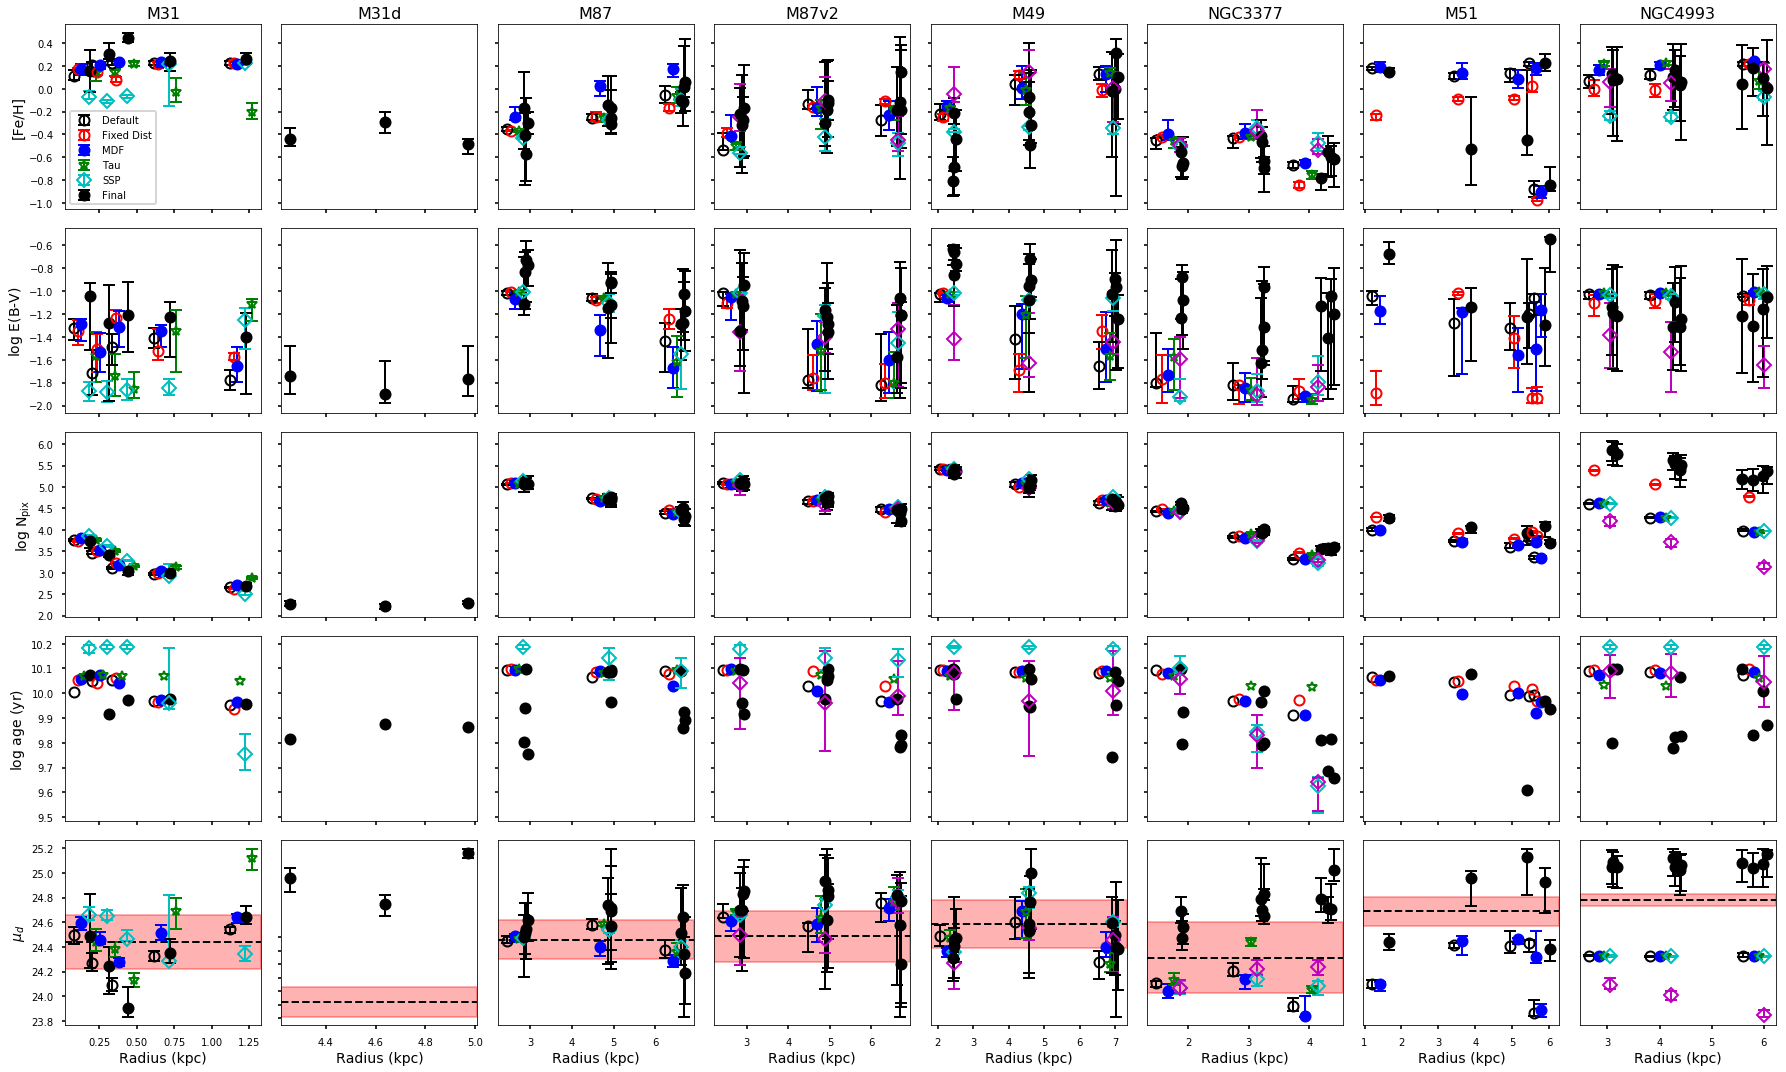

In [39]:
fig, axes = plt.subplots(ncols=8, nrows=5, figsize=(25, 15), sharex='col', sharey='row')
for a in axes[-1]:
    a._shared_y_axes.remove(a)
for i, g in enumerate(['M31', 'M31d', 'M87', 'M87v2', 'M49', 'NGC3377', 'M51', 'NGC4993']):
    a = axes[:,i]
    if g in ['M31', 'M51']:
        rs = ['a', 'b', 'c', 'd', 'e']
    elif g == 'M31d':
        rs = ['a','b','c']
    else:
        rs = ['a1', 'b1', 'c1', 'a2','b2','c2','a3','b3','c3','a4','b4','c4']
    for j, r in enumerate(rs):
        # Model 1
        k = f'{g}_{r}_m1'
        c,m,mfc = 'k','o','None'
        dx = (-0.05 if g=='M31' else -0.2)
        if k in results:
            results[k].plot_errorbars([a[0], a[1], None, None, None, None, None, a[4], a[2]], x=radii_kpc[k]+dx, color=c, marker=m, mfc=mfc, label=('Default' if j==0 else None))
            a[3].plot(radii_kpc[k]+dx, results[k].best_model.sfh_model.mean_age,  color=c, marker=m, mfc=mfc,  ms=10)
        
        # Model 2
        k = f'{g}_{r}_m2'
        c,m,mfc = 'r','o','None'
        dx = (-0.02 if g=='M31' else -0.1)
        if k in results:
            results[k].plot_errorbars([a[0], a[1], None, None, None, None, None, a[2]], x=radii_kpc[k]+dx,  color=c, marker=m, mfc=mfc,  label=('Fixed Dist' if j==0 else None))
            a[3].plot(radii_kpc[k]+dx, results[k].best_model.sfh_model.mean_age,  color=c, marker=m, mfc=mfc,  ms=10)
        
        # Model 3
        k = f'{g}_{r}_m3'
        c,m,mfc = 'b','o','b'
        dx = 0.
        if k in results:
            results[k].plot_errorbars([a[0], a[1], None, None, None, None, None, a[4], a[2]], x=radii_kpc[k]+dx,  color=c, marker=m, mfc=mfc,  label=('MDF' if j==0 else None))
            a[3].plot(radii_kpc[k], results[k].best_model.sfh_model.mean_age, color=c, marker=m, mfc=mfc,  ms=10)
        
        # Model 4
        #### REMOVE THIS SOON
        k = f'{g}_{r}_m4'
        c,m,mfc = 'g','*','None'
        dx = (0.02 if g=='M31' else 0.1)
        if k in results:
            results[k].plot_errorbars([a[0], a[1], a[2], None, a[4]], x=radii_kpc[k]+0.1,  color=c, marker=m, mfc=mfc,  label=('Tau' if j==0 else None))
            a[3].plot(radii_kpc[k]+dx, results[k].best_model.sfh_model.mean_age,  color=c, marker=m, mfc=mfc,  ms=10)

        # Model 5
        k = f'{g}_{r}_m5'
        c,m,mfc = 'c','D','None'
        dx = (0.05 if g=='M31' else 0.2)
        if k in results:
            results[k].plot_errorbars(a, x=radii_kpc[k]+dx,  color=c, marker=m, mfc=mfc,  label=('SSP' if j==0 else None))
    #         a[3].plot(radii_kpc[k]+dx, results[k].best_model.sfh_model.mean_age, marker='o', color='k', ms=10)

        # Model 7
        k = f'{g}_{r}_m7'
        c,m,mfc = 'k','o','k'
        dx = (0.06 if g=='M31' else 0.25)
        if k in results:
            results[k].plot_errorbars([a[0], a[1], None, None, None, None, None, a[4], a[2]], x=radii_kpc[k]+dx, color=c, marker=m, mfc=mfc, label=('Final' if j==0 else None))
            a[3].plot(radii_kpc[k]+dx, results[k].best_model.sfh_model.mean_age,  color=c, marker=m, mfc=mfc,  ms=10)
    
        # Model 8
        k = f'{g}_{r}_m8'
        c,m,mfc = 'm','D','None'
        dx = (0.05 if g=='M31' else 0.2)
        if k in results:
            results[k].plot_errorbars(a, x=radii_kpc[k]+dx,  color=c, marker=m, mfc=mfc,  label=('SSP2' if j==0 else None))
    #         a[3].plot(radii_kpc[k]+dx, results[k].best_model.sfh_model.mean_age, marker='o', color='k', ms=10)

    a[-1].axhline(y=dmods[g], ls='--', color='k')
    a[-1].axhspan(dmods[g]-0.22, dmods[g]+0.22, color='r', alpha=0.3)
    a[0].set_title(g)
axes[0,0].legend(loc=0, fontsize=10)
for a in axes[-1]:
    a.set_xlabel('Radius (kpc)')
for i, a in enumerate(axes[:,0]):
    a.set_ylabel(results['M87_a1_m5'].labels[i])
fig.tight_layout()

# M31

In [19]:
for k in [k for k in results.keys() if 'M31' in k]:
    r = results[k]
    if r.df.live.mean() > 0.0:
        print(k, r.as_dynesty()['delta_logz'][-1])
    else:
        print(k, r.as_dynesty()['delta_logz'][-1], '--DONE')

M31_e_m1 4.611681492860953e-05 --DONE
M31_d_m1 0.004531120674528211 --DONE
M31_c_m1 0.0008204757432395127 --DONE
M31_b_m1 0.0007618114102569962 --DONE
M31_a_m1 0.006889994996754467 --DONE
M31_e_m2 2.2778795027988963e-07 --DONE
M31_d_m2 0.002519956670994361 --DONE
M31_c_m2 0.0006256293950173131 --DONE
M31_b_m2 2.9803032475683722e-05 --DONE
M31_a_m2 0.0008410899253021853 --DONE
M31_e_m3 0.0008141322500705428 --DONE
M31_d_m3 0.026522425539269534 --DONE
M31_c_m3 0.04929980809811241 --DONE
M31_b_m3 0.006715431582506426 --DONE
M31_a_m3 0.14760239382883356
M31_e_m4 1.9920630620617885e-06 --DONE
M31_d_m4 1.1431040547904558e-05 --DONE
M31_c_m4 5.064511515229242e-05 --DONE
M31_b_m4 5.6852513807825744e-09 --DONE
M31_a_m4 1.6034216514526634e-06 --DONE
M31_e_m5 0.0002079886412502674 --DONE
M31_d_m5 1.1987186553596985e-05 --DONE
M31_c_m5 4.817085937247612e-06 --DONE
M31_b_m5 4.731859007733874e-06 --DONE
M31_a_m5 2.7724581741495058e-08 --DONE
M31_e_m7 0.17179541443056223
M31_d_m7 0.18009360074756842


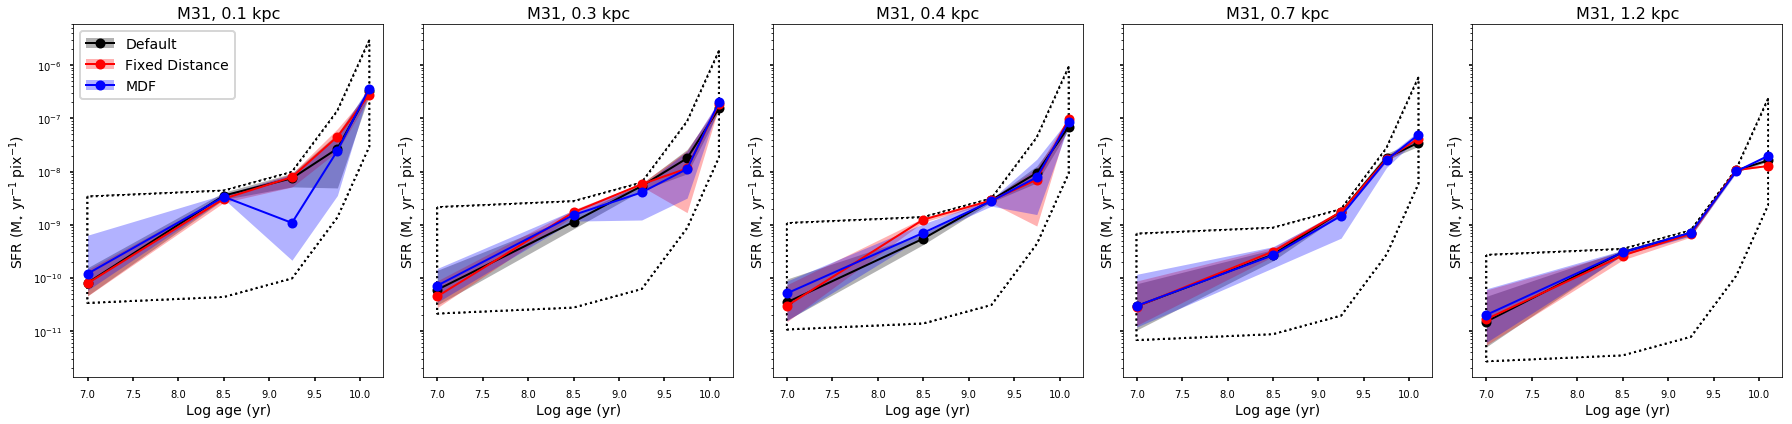

In [11]:
fig, axes = plt.subplots(ncols=5, figsize=(25, 6), sharex=True, sharey=True)
for i, r in enumerate(['e','d','c','b','a']):
    ax = axes[i]
    ax, lines1 = results[f'M31_{r}_m1'].plot_sfr(ax=ax, color='k')
    ax, lines2 = results[f'M31_{r}_m2'].plot_sfr(ax=ax, color='r')
    ax, lines3 = results[f'M31_{r}_m3'].plot_sfr(ax=ax, color='b')
#     ax, lines4 = results[f'M31_{r}_m6'].plot_sfr(ax=ax, color='c')
    if i == 0:
#         ax.legend(((lines1[0], lines1[2]), (lines2[0], lines2[2]), (lines3[0], lines3[2]), (lines4[0], lines4[2])), ('Default', 'Fixed Distance', 'MDF', 'Final'))
        ax.legend(((lines1[0], lines1[2]), (lines2[0], lines2[2]), (lines3[0], lines3[2])), ('Default', 'Fixed Distance', 'MDF'))
    else:
        ax.get_legend().remove()
    k = f'M31_{r}_m1'
    ax.set_title(f'M31, {radii_kpc[k]:.1f} kpc')
fig.tight_layout()

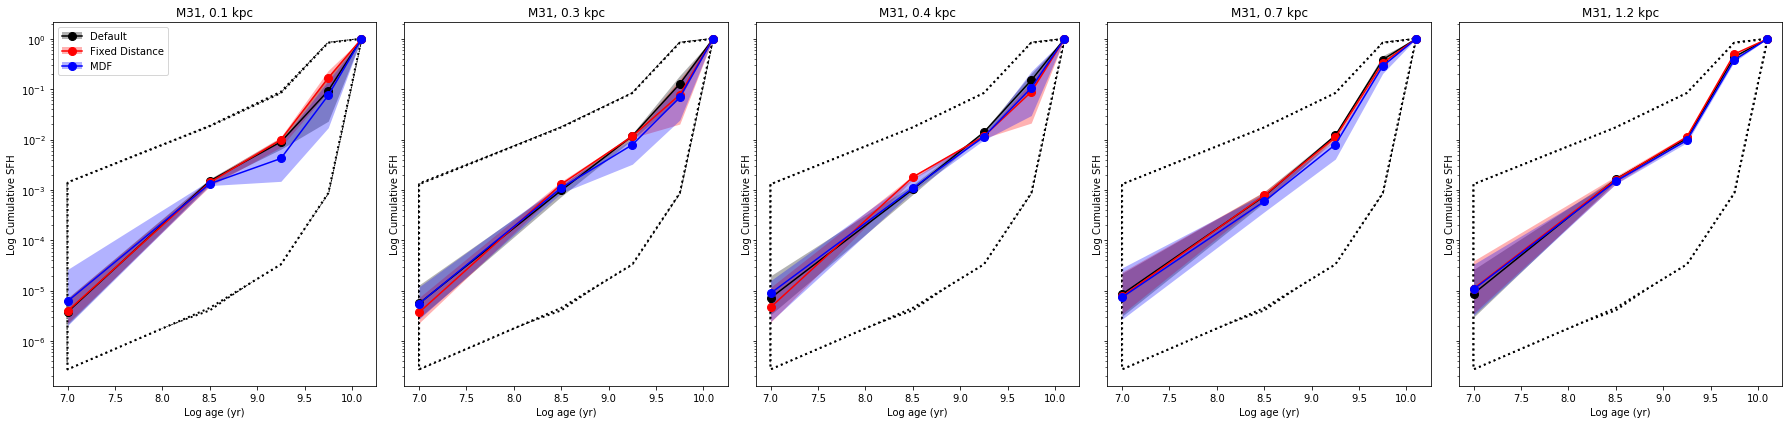

In [5]:
fig, axes = plt.subplots(ncols=5, figsize=(25, 6), sharex=True, sharey=True)
for i, r in enumerate(['e','d','c','b','a']):
    ax = axes[i]
    ax, lines1 = results[f'M31_{r}_m1'].plot_cum_sfh(ax=ax, color='k')
    ax, lines2 = results[f'M31_{r}_m2'].plot_cum_sfh(ax=ax, color='r')
    ax, lines3 = results[f'M31_{r}_m3'].plot_cum_sfh(ax=ax, color='b')
#     ax, lines4 = results[f'M31_{r}_m6'].plot_sfr(ax=ax, color='c')
    if i == 0:
#         ax.legend(((lines1[0], lines1[2]), (lines2[0], lines2[2]), (lines3[0], lines3[2]), (lines4[0], lines4[2])), ('Default', 'Fixed Distance', 'MDF', 'Final'))
        ax.legend(((lines1[0], lines1[2]), (lines2[0], lines2[2]), (lines3[0], lines3[2])), ('Default', 'Fixed Distance', 'MDF'))
    else:
        ax.get_legend().remove()
    k = f'M31_{r}_m1'
    ax.set_title(f'M31, {radii_kpc[k]:.1f} kpc')
fig.tight_layout()

In [ ]:
fig, axes = many_pcmd_compares(['M31_a_m1', 'M31_b_m1', 'M31_c_m1', 'M31_d_m1', 'M31_e_m1'])

In [ ]:
fig, axes = many_pcmd_compares(['M31_a_m3', 'M31_b_m3', 'M31_c_m3', 'M31_d_m3', 'M31_e_m3'])

In [ ]:
fig, axes = many_pcmd_compares(['M31_a_m4', 'M31_b_m4', 'M31_c_m4', 'M31_d_m4', 'M31_e_m4'])

In [ ]:
fig, axes = many_pcmd_compares(['M31_a_m5', 'M31_b_m5', 'M31_c_m5', 'M31_d_m5', 'M31_e_m5'])

In [ ]:
results['M31_a_m1'].as_dynesty()['logz'][-1]

In [ ]:
results['M31_a_m2'].as_dynesty()['logz'][-1]

In [ ]:
results['M31_a_m3'].as_dynesty()['logz'][-1]

In [ ]:
results['M31_a_m4'].as_dynesty()['logz'][-1]

In [ ]:
results['M31_a_m5'].as_dynesty()['logz'][-1]

# M87

In [15]:
for k in [k for k in results.keys() if 'M87' in k and 'M87v2' not in k]:
    r = results[k]
    if r.df.live.mean() > 0.0:
        print(k, r.as_dynesty()['delta_logz'][-1])
    else:
        print(k, r.as_dynesty()['delta_logz'][-1], '--DONE')
        

M87_a1_m1 0.5162805347335961 --DONE
M87_b1_m1 0.07984997233830171 --DONE
M87_c1_m1 0.036580557660812474 --DONE
M87_a1_m2 0.00011793160298623206 --DONE
M87_b1_m2 0.0015483471860378017 --DONE
M87_c1_m2 0.0005326117419883758 --DONE
M87_a1_m3 0.3110162378699215 --DONE
M87_b1_m3 0.061829558162472154 --DONE
M87_c1_m3 0.05863948597755808 --DONE
M87_a1_m4 2.2104959640500965e-06 --DONE
M87_b1_m4 0.0019292875707819235 --DONE
M87_c1_m4 4.49216447151457e-05 --DONE
M87_a1_m5 1.4009350621790873e-06 --DONE
M87_b1_m5 0.0033791305336663413 --DONE
M87_c1_m5 0.0019324645720715239 --DONE
M87_a1_m7 0.16383483733704907
M87_b1_m7 0.17633560863748698
M87_c1_m7 0.15696727290512058


In [16]:
for k in [k for k in results.keys() if 'M87v2' in k]:
    r = results[k]
    if r.df.live.mean() > 0.0:
        print(k, r.as_dynesty()['delta_logz'][-1])
    else:
        print(k, r.as_dynesty()['delta_logz'][-1], '--DONE')
        

M87v2_a1_m1 0.31463350493095277 --DONE
M87v2_b1_m1 0.16090868146581272 --DONE
M87v2_c1_m1 0.08179017191058335
M87v2_a1_m2 0.0028546444976456087 --DONE
M87v2_b1_m2 0.042419057746286626
M87v2_c1_m2 0.001003095827130096 --DONE
M87v2_a1_m3 0.5273005484296931 --DONE
M87v2_b1_m3 0.03772076362623977 --DONE
M87v2_c1_m3 0.04120427617505129 --DONE
M87v2_a1_m4 2.8266890410577616e-06 --DONE
M87v2_b1_m4 6.74879546096463e-05 --DONE
M87v2_c1_m4 0.00017008464807588553 --DONE
M87v2_a1_m5 0.04264805879574851 --DONE
M87v2_b1_m5 0.018723833132753498 --DONE
M87v2_c1_m5 0.017162786804334473 --DONE
M87v2_a1_m7 0.1692163312709738
M87v2_b1_m7 0.17320373323414628
M87v2_c1_m7 0.16361163682060464


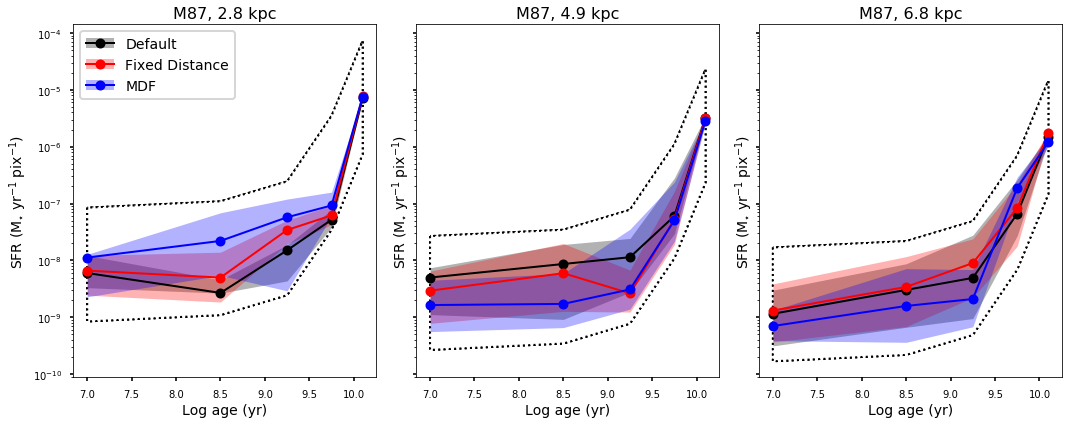

In [13]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 6), sharex=True, sharey=True)
for i, r in enumerate(['a','b','c']):
    ax = axes[i]
    ax, lines1 = results[f'M87_{r}1_m1'].plot_sfr(ax=ax, color='k')
    ax, lines2 = results[f'M87_{r}1_m2'].plot_sfr(ax=ax, color='r')
    ax, lines3 = results[f'M87_{r}1_m3'].plot_sfr(ax=ax, color='b')
    if i == 0:
        ax.legend(((lines1[0], lines1[2]), (lines2[0], lines2[2]), (lines3[0], lines3[2])), ('Default', 'Fixed Distance', 'MDF'))
    else:
        ax.get_legend().remove()
    k = f'M87_{r}1_m1'
    ax.set_title(f'M87, {radii_kpc[k]:.1f} kpc')
fig.tight_layout()

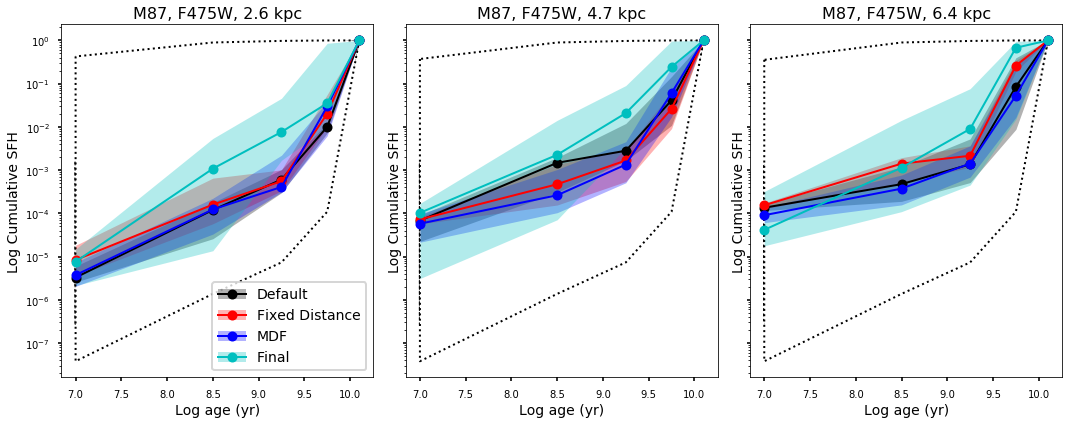

In [41]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 6), sharex=True, sharey=True)
for i, r in enumerate(['a','b','c']):
    ax = axes[i]
    ax, lines1 = results[f'M87v2_{r}1_m1'].plot_cum_sfh(ax=ax, color='k')
    ax, lines2 = results[f'M87v2_{r}1_m2'].plot_cum_sfh(ax=ax, color='r')
    ax, lines3 = results[f'M87v2_{r}1_m3'].plot_cum_sfh(ax=ax, color='b')
    ax, lines4 = results[f'M87v2_{r}1_m7'].plot_cum_sfh(ax=ax, color='c')
    if i == 0:
        ax.legend(((lines1[0], lines1[2]), (lines2[0], lines2[2]), (lines3[0], lines3[2]), (lines4[0], lines4[2])), ('Default', 'Fixed Distance', 'MDF', 'Final'))
    else:
        ax.get_legend().remove()
    k = f'M87v2_{r}1_m1'
    ax.set_title(f'M87, F475W, {radii_kpc[k]:.1f} kpc')
fig.tight_layout()

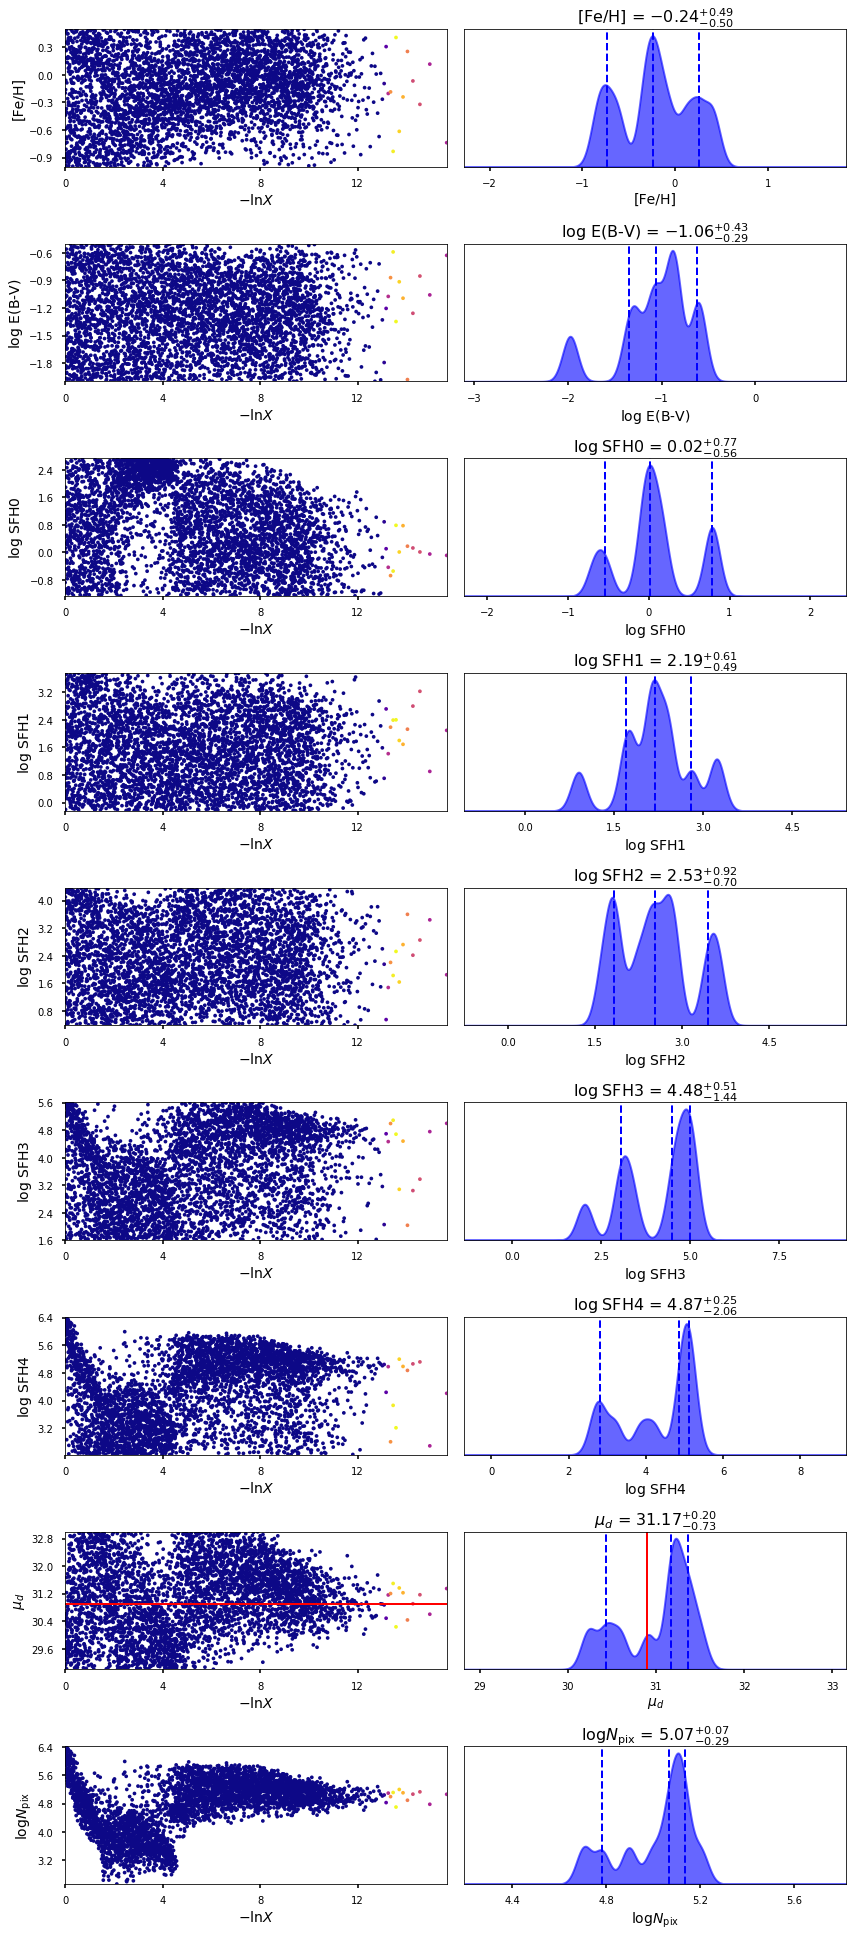

In [17]:
results['M87v2_a1_m7'].plot_trace();

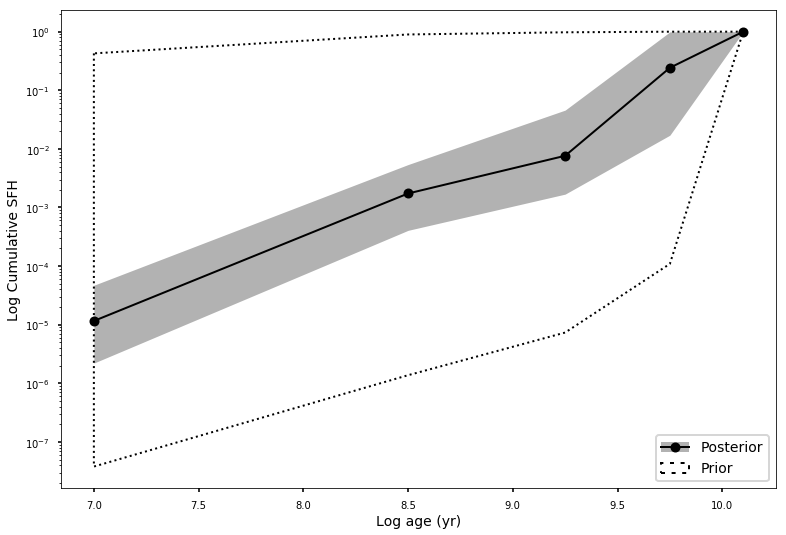

In [19]:
results['M87v2_a1_m7'].plot_cum_sfh();

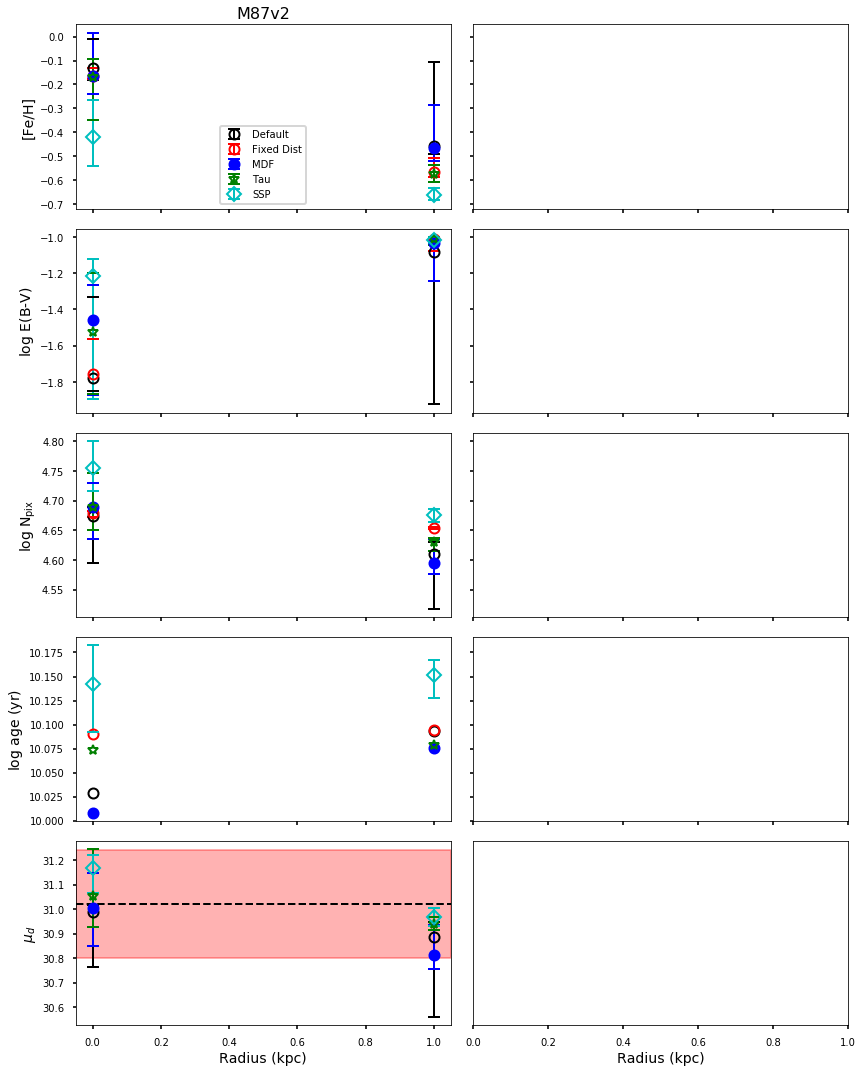

In [10]:
# fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(12, 15), sharex='col', sharey='row')
# for a in axes[-1]:
#     a._shared_y_axes.remove(a)
# for i, g in enumerate(['M87v2']):
#     a = axes[:,i]
#     rs = ['b1', 'wide']
#     for j, r in enumerate(rs):
#         # Model 1
#         k = f'{g}_{r}_m1'
#         c,m,mfc = 'k','o','None'
#         dx = (-0.05 if g=='M31' else -0.2)
#         results[k].plot_errorbars([a[0], a[1], None, None, None, None, None, a[4], a[2]], x=j, color=c, marker=m, mfc=mfc, label=('Default' if j==0 else None))
#         a[3].plot(j, results[k].best_model.sfh_model.mean_age,  color=c, marker=m, mfc=mfc,  ms=10)
        
#         # Model 2
#         k = f'{g}_{r}_m2'
#         c,m,mfc = 'r','o','None'
#         dx = (-0.02 if g=='M31' else -0.1)
#         results[k].plot_errorbars([a[0], a[1], None, None, None, None, None, a[2]], x=j,  color=c, marker=m, mfc=mfc,  label=('Fixed Dist' if j==0 else None))
#         a[3].plot(j, results[k].best_model.sfh_model.mean_age,  color=c, marker=m, mfc=mfc,  ms=10)
        
#         # Model 3
#         k = f'{g}_{r}_m3'
#         c,m,mfc = 'b','o','b'
#         dx = 0.
#         results[k].plot_errorbars([a[0], a[1], None, None, None, None, None, a[4], a[2]], x=j,  color=c, marker=m, mfc=mfc,  label=('MDF' if j==0 else None))
#         a[3].plot(j, results[k].best_model.sfh_model.mean_age, color=c, marker=m, mfc=mfc,  ms=10)
        
#         # Model 4
#         #### REMOVE THIS SOON
#         if g != 'M51':
#             k = f'{g}_{r}_m4'
#             c,m,mfc = 'g','*','None'
#             dx = (0.02 if g=='M31' else 0.1)
#             results[k].plot_errorbars([a[0], a[1], a[2], None, a[4]], x=j,  color=c, marker=m, mfc=mfc,  label=('Tau' if j==0 else None))
#             a[3].plot(j, results[k].best_model.sfh_model.mean_age,  color=c, marker=m, mfc=mfc,  ms=10)
        
#         # Model 5
#         if g != 'M51':
#             k = f'{g}_{r}_m5'
#             c,m,mfc = 'c','D','None'
#             dx = (0.05 if g=='M31' else 0.2)
#             results[k].plot_errorbars(a, x=j,  color=c, marker=m, mfc=mfc,  label=('SSP' if j==0 else None))
#     #         a[3].plot(radii_kpc[k]+dx, results[k].best_model.sfh_model.mean_age, marker='o', color='k', ms=10)

#     a[-1].axhline(y=dmods[g], ls='--', color='k')
#     a[-1].axhspan(dmods[g]-0.22, dmods[g]+0.22, color='r', alpha=0.3)
#     a[0].set_title(g)
# axes[0,0].legend(loc=0, fontsize=10)
# for a in axes[-1]:
#     a.set_xlabel('Radius (kpc)')
# for i, a in enumerate(axes[:,0]):
#     a.set_ylabel(results['M87v2_a1_m5'].labels[i])
# fig.tight_layout()

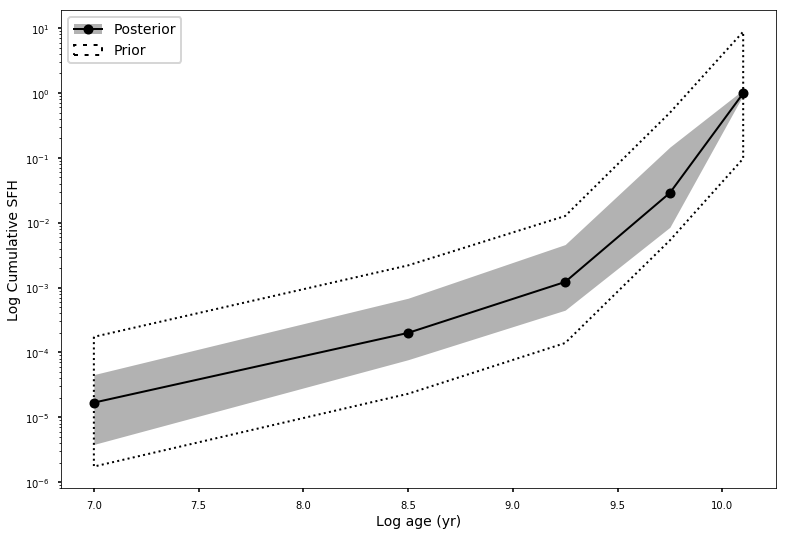

In [32]:
results['M87v2_a1_m6'].plot_cum_sfh();

# M49

In [20]:
for k in [k for k in results.keys() if 'M49' in k]:
    r = results[k]
    if r.df.live.mean() > 0.0:
        print(k, r.as_dynesty()['delta_logz'][-1])
    else:
        print(k, r.as_dynesty()['delta_logz'][-1], '--DONE')
        

M49_a1_m1 0.03470241072125191 --DONE
M49_b1_m1 0.015888294237868195 --DONE
M49_c1_m1 0.012043221352939781 --DONE
M49_a1_m2 0.004323011116099451 --DONE
M49_b1_m2 0.00850729215045476 --DONE
M49_c1_m2 0.0013971699485182398 --DONE
M49_a1_m3 0.23094606974706267 --DONE
M49_b1_m3 0.11656898479452593 --DONE
M49_c1_m3 0.027349113888163856 --DONE
M49_a1_m4 0.0005298712531498495 --DONE
M49_b1_m4 7.657622205670123e-06 --DONE
M49_c1_m4 6.337456281357845e-05 --DONE
M49_a1_m5 0.4568474315676667 --DONE
M49_b1_m5 0.2444705887641021 --DONE
M49_c1_m5 0.12855980068383133 --DONE
M49_a1_m7 0.15036827674919095
M49_b1_m7 0.1730023191741452
M49_c1_m7 0.14453175994066214


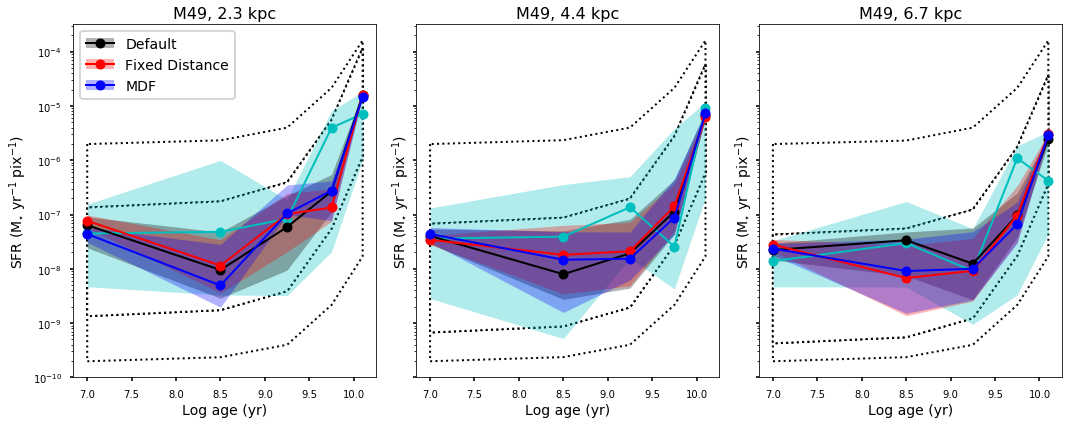

In [40]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 6), sharex=True, sharey=True)
for i, r in enumerate(['a','b','c']):
    ax = axes[i]
    ax, lines4 = results[f'M49_{r}1_m7'].plot_sfr(ax=ax, color='c')
    ax, lines1 = results[f'M49_{r}1_m1'].plot_sfr(ax=ax, color='k')
    ax, lines2 = results[f'M49_{r}1_m2'].plot_sfr(ax=ax, color='r')
    ax, lines3 = results[f'M49_{r}1_m3'].plot_sfr(ax=ax, color='b')
    if i == 0:
        ax.legend(((lines1[0], lines1[2]), (lines2[0], lines2[2]), (lines3[0], lines3[2])), ('Default', 'Fixed Distance', 'MDF'))
    else:
        ax.get_legend().remove()
    k = f'M49_{r}1_m1'
    ax.set_title(f'M49, {radii_kpc[k]:.1f} kpc')
fig.tight_layout()

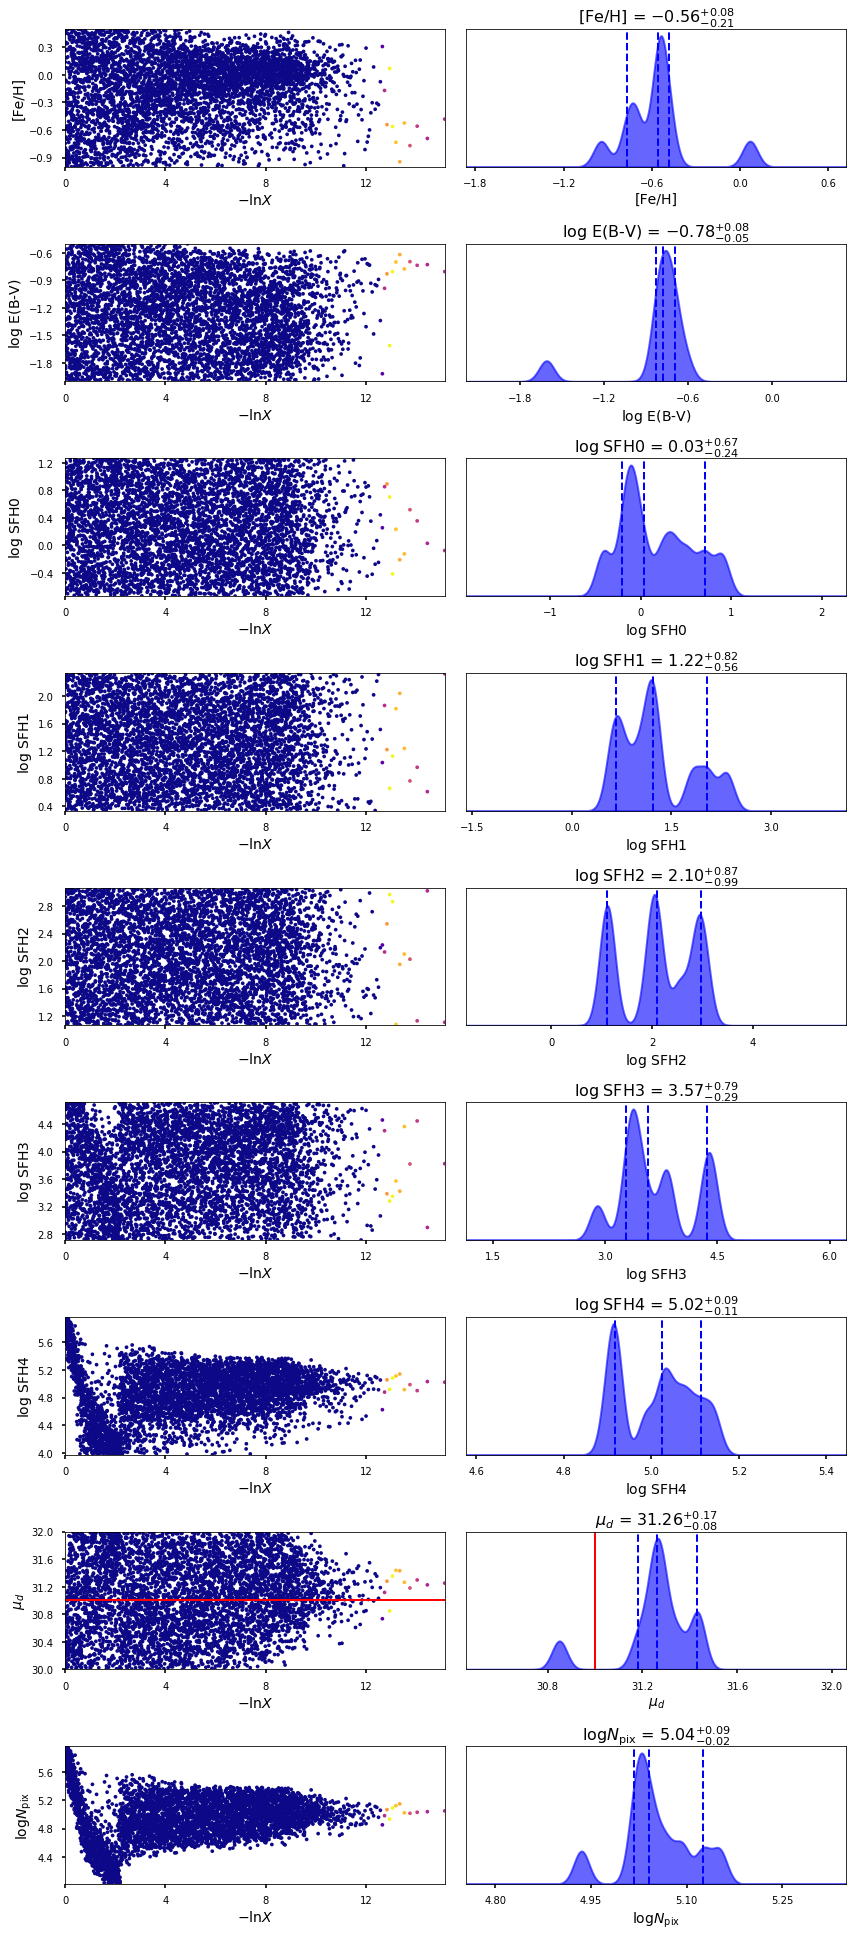

In [34]:
results['M49_b1_m6'].plot_trace();

# NGC 3377

In [22]:
for k in [k for k in results.keys() if 'NGC3377' in k]:
    r = results[k]
    if r.df.live.mean() > 0.0:
        print(k, r.as_dynesty()['delta_logz'][-1])
    else:
        print(k, r.as_dynesty()['delta_logz'][-1], '--DONE')
        

NGC3377_a1_m1 0.32119924577563097 --DONE
NGC3377_b1_m1 0.11293445306995409
NGC3377_c1_m1 0.14565327869877365 --DONE
NGC3377_a1_m2 0.15422306542711794 --DONE
NGC3377_b1_m2 0.7704898757172032 --DONE
NGC3377_c1_m2 0.08629954407342666
NGC3377_a1_m3 0.03738586151786194 --DONE
NGC3377_b1_m3 0.12931624324119184
NGC3377_c1_m3 0.4082973365404996 --DONE
NGC3377_a1_m4 3.7224875299557425e-05 --DONE
NGC3377_b1_m4 2.012684990404523e-05 --DONE
NGC3377_c1_m4 6.338819844131649e-05 --DONE
NGC3377_a1_m5 0.0013302724022707935 --DONE
NGC3377_b1_m5 0.0015325779260138006 --DONE
NGC3377_c1_m5 0.0020730669559725357 --DONE
NGC3377_a1_m7 0.1559280232374931
NGC3377_b1_m7 0.15623981707568646
NGC3377_c1_m7 0.13755735606946473
NGC3377_a1_m8 0.0439101611626711
NGC3377_b1_m8 0.04647336171893812
NGC3377_c1_m8 0.07601354488576817


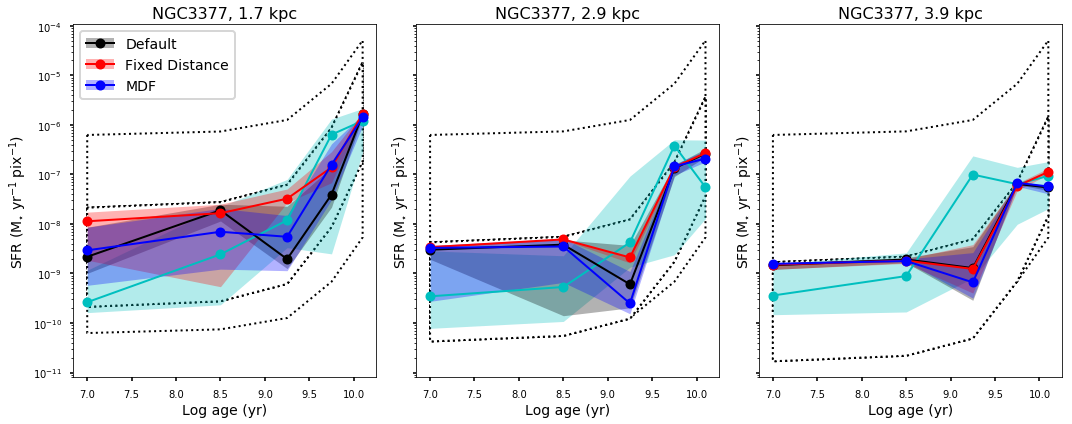

In [42]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 6), sharex=True, sharey=True)
for i, r in enumerate(['a','b','c']):
    ax = axes[i]
    ax, lines4 = results[f'NGC3377_{r}1_m7'].plot_sfr(ax=ax, color='c')
    ax, lines1 = results[f'NGC3377_{r}1_m1'].plot_sfr(ax=ax, color='k')
    ax, lines2 = results[f'NGC3377_{r}1_m2'].plot_sfr(ax=ax, color='r')
    ax, lines3 = results[f'NGC3377_{r}1_m3'].plot_sfr(ax=ax, color='b')
    if i == 0:
        ax.legend(((lines1[0], lines1[2]), (lines2[0], lines2[2]), (lines3[0], lines3[2])), ('Default', 'Fixed Distance', 'MDF'))
    else:
        ax.get_legend().remove()
    k = f'NGC3377_{r}1_m1'
    ax.set_title(f'NGC3377, {radii_kpc[k]:.1f} kpc')
fig.tight_layout()

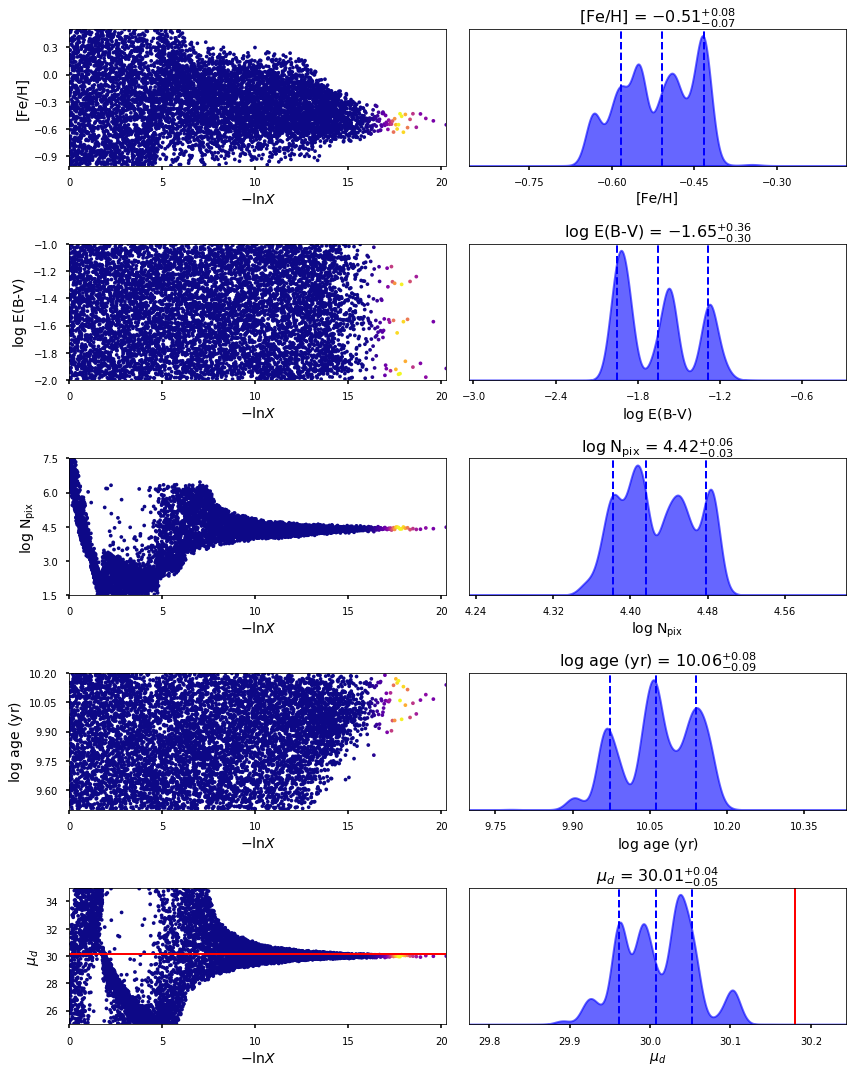

In [23]:
results['NGC3377_a1_m8'].plot_trace();

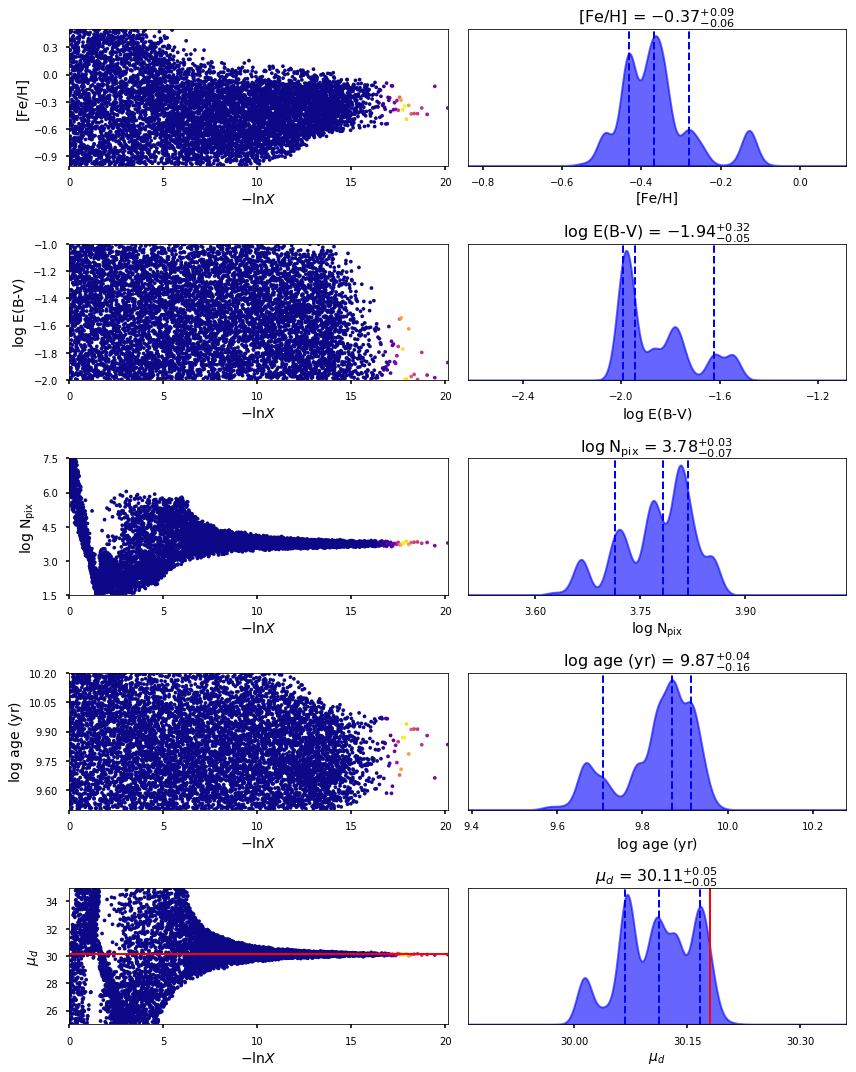

In [24]:
results['NGC3377_b1_m8'].plot_trace();

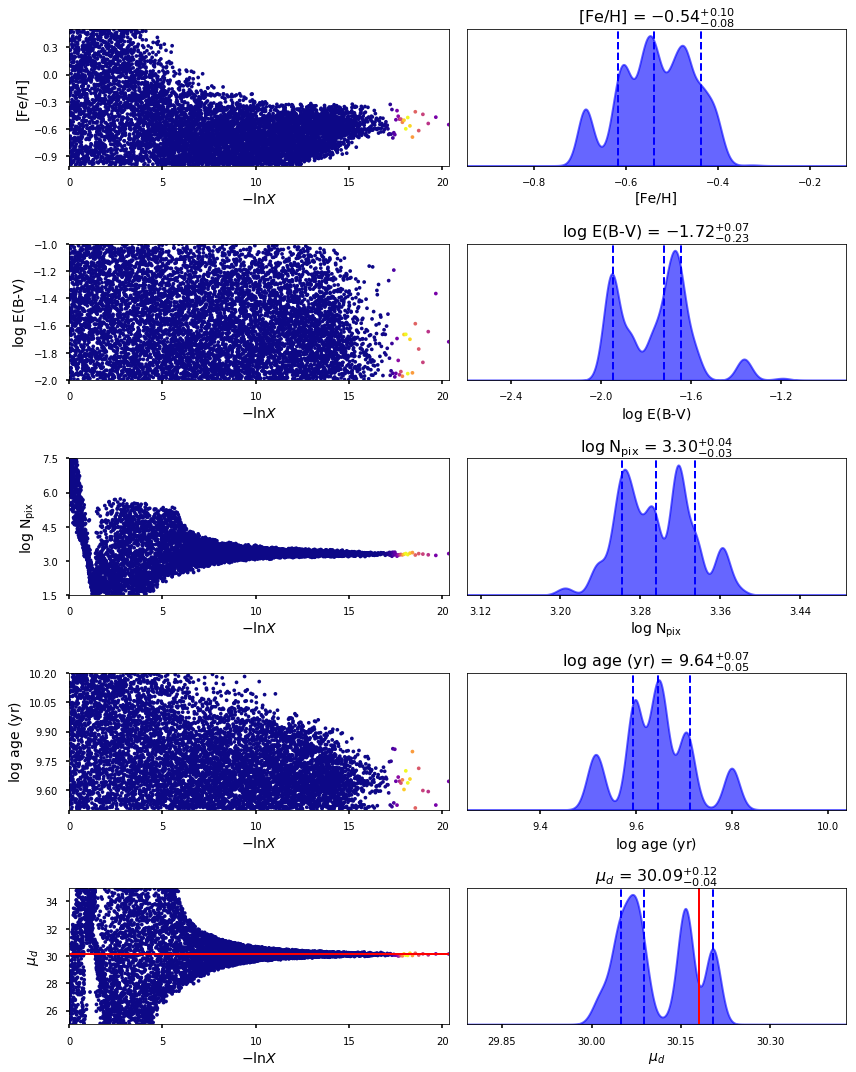

In [25]:
results['NGC3377_c1_m8'].plot_trace();

Modeling best fit for NGC3377_a1_m8
Modeling best fit for NGC3377_b1_m8
Modeling best fit for NGC3377_c1_m8


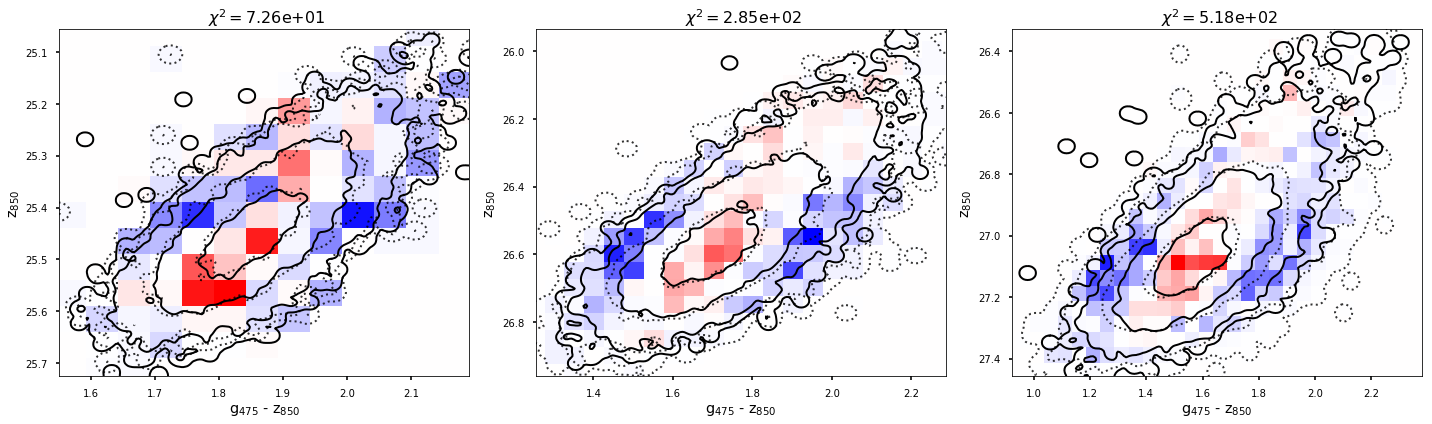

In [26]:
for k in ['NGC3377_a1_m8', 'NGC3377_b1_m8', 'NGC3377_c1_m8']:
    if k in pcmds:
        pcmds.pop(k)
fig, axes = many_pcmd_compares(['NGC3377_a1_m8', 'NGC3377_b1_m8', 'NGC3377_c1_m8'], residuals=True)
for a in axes:
    a.axhline(y=filters['NGC3377'][0].counts_to_mag(sky['NGC3377'][0]), color='r', ls='--')
#     a.set_ylim(ymin=28.5)

Modeling best fit for M31_a_m7
Modeling best fit for M31_b_m7
Modeling best fit for M31_c_m7
Modeling best fit for M31_d_m7
Modeling best fit for M31_e_m7


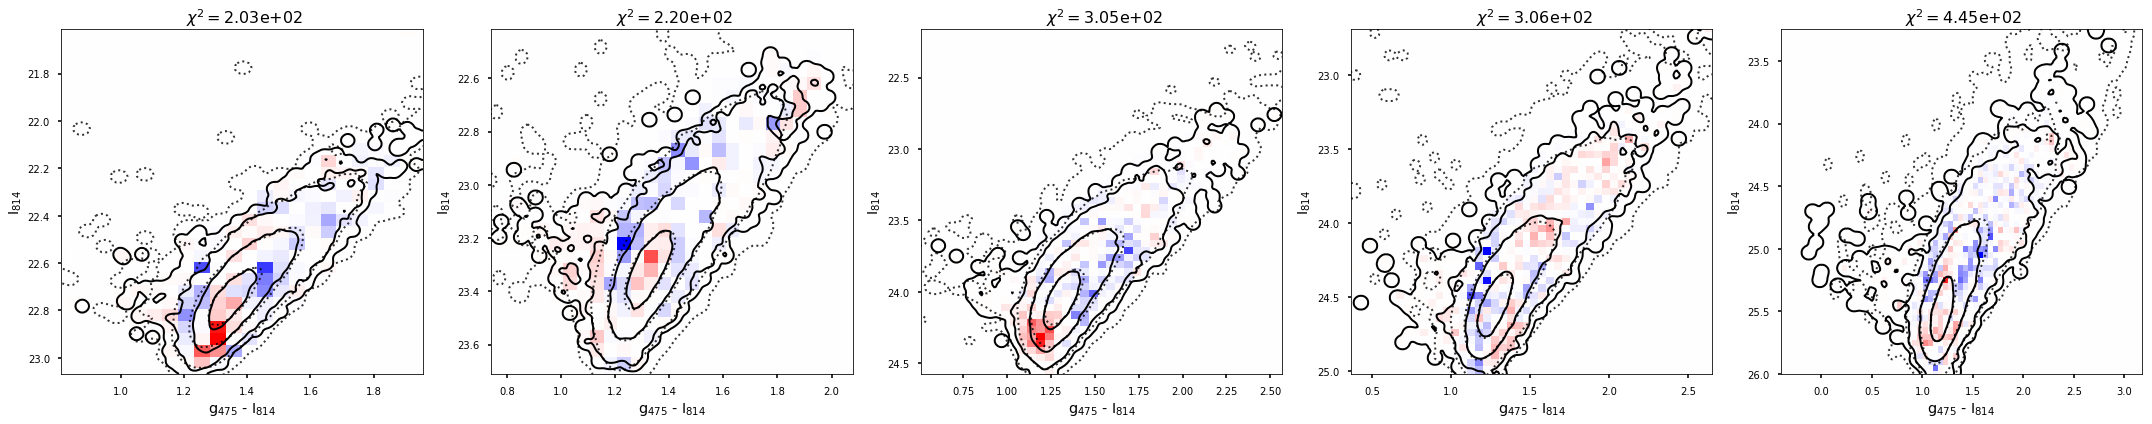

In [34]:
for k in ['M31_a_m7', 'M31_b_m7','M31_c_m7','M31_d_m7','M31_e_m7']:
    if k in pcmds:
        pcmds.pop(k)
fig, axes = many_pcmd_compares(['M31_a_m7', 'M31_b_m7','M31_c_m7','M31_d_m7','M31_e_m7'], residuals=True, gain=1.0)
for a in axes:
    a.axhline(y=filters['M31'][0].counts_to_mag(sky['M31'][0]), color='r', ls='--')
#     a.set_ylim(ymin=28.5)

Modeling best fit for M51_a_m7
Modeling best fit for M51_b_m7
Modeling best fit for M51_c_m7
Modeling best fit for M51_d_m7
Modeling best fit for M51_e_m7


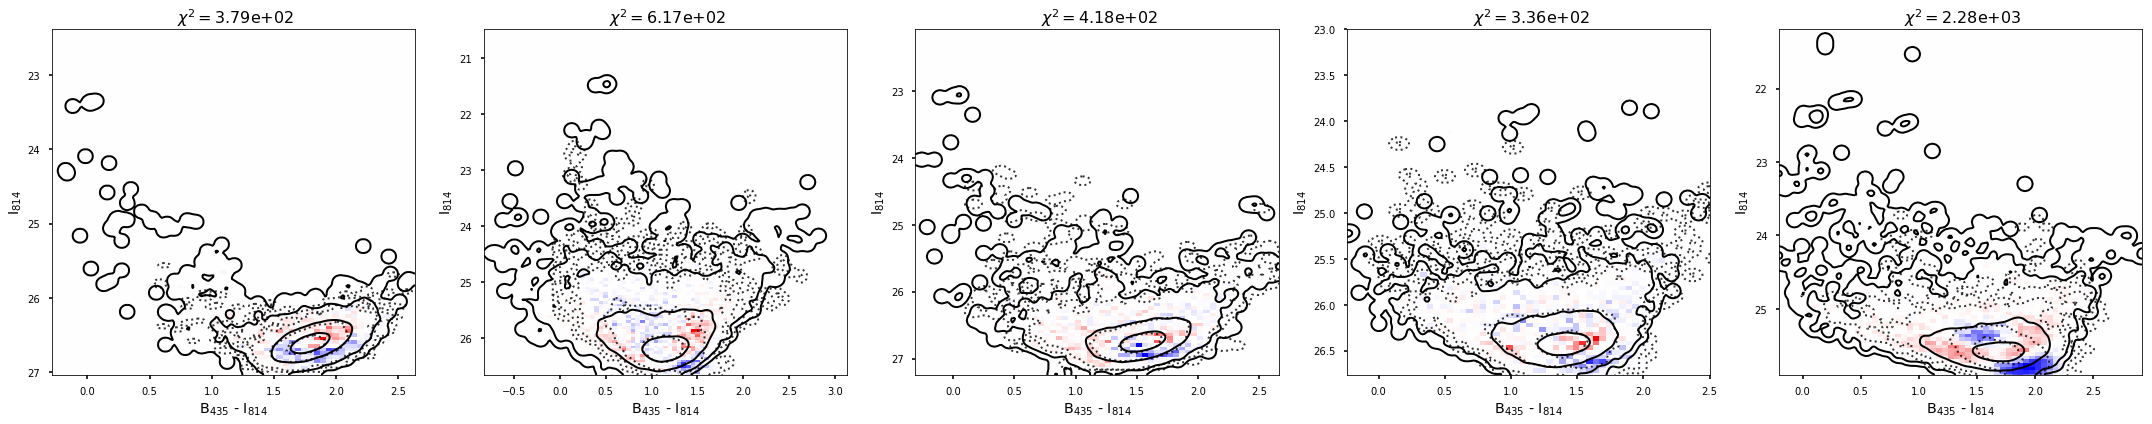

In [33]:
for k in ['M51_a_m7', 'M51_b_m7','M51_c_m7','M51_d_m7','M51_e_m7']:
    if k in pcmds:
        pcmds.pop(k)
fig, axes = many_pcmd_compares(['M51_a_m7', 'M51_b_m7','M51_c_m7','M51_d_m7','M51_e_m7'], residuals=True, gain=2.0)
for a in axes:
    a.axhline(y=filters['M51'][0].counts_to_mag(sky['M51'][0]), color='r', ls='--')
#     a.set_ylim(ymin=28.5)

# NGC4993

In [27]:
for k in [k for k in results.keys() if 'NGC4993' in k]:
    r = results[k]
    if r.df.live.mean() > 0.0:
        print(k, r.as_dynesty()['delta_logz'][-1])
    else:
        print(k, r.as_dynesty()['delta_logz'][-1], '--DONE')
        

NGC4993_a1_m1 0.00019240811478482556 --DONE
NGC4993_b1_m1 0.0012629243443313953
NGC4993_c1_m1 0.09243522348731403
NGC4993_a1_m2 0.0003423284204018273 --DONE
NGC4993_b1_m2 0.0038244217460032814
NGC4993_c1_m2 0.003426293742904818
NGC4993_a1_m3 0.00027020629609353364 --DONE
NGC4993_b1_m3 0.002770593528310883
NGC4993_c1_m3 0.013519651759281714
NGC4993_a1_m4 0.00011029770963943974 --DONE
NGC4993_b1_m4 3.209880190979675e-06 --DONE
NGC4993_c1_m4 0.005115947172384949
NGC4993_a1_m5 0.00010286195204400883 --DONE
NGC4993_b1_m5 5.29978046870383e-06 --DONE
NGC4993_c1_m5 0.00012207218060211744 --DONE
NGC4993_a1_m7 0.0275811771083454
NGC4993_a2_m7 0.02176557197263662
NGC4993_a4_m7 0.036632452650366076
NGC4993_b1_m7 0.02480039133280343
NGC4993_b2_m7 0.02849126893841003
NGC4993_b3_m7 0.016734683219553403
NGC4993_b4_m7 0.024818226736556426
NGC4993_c1_m7 0.05270736165272183
NGC4993_c2_m7 0.025811747214191882
NGC4993_c3_m7 0.030529237082532745
NGC4993_c4_m7 0.030968346117589363
NGC4993_a1_m8 0.10108820022

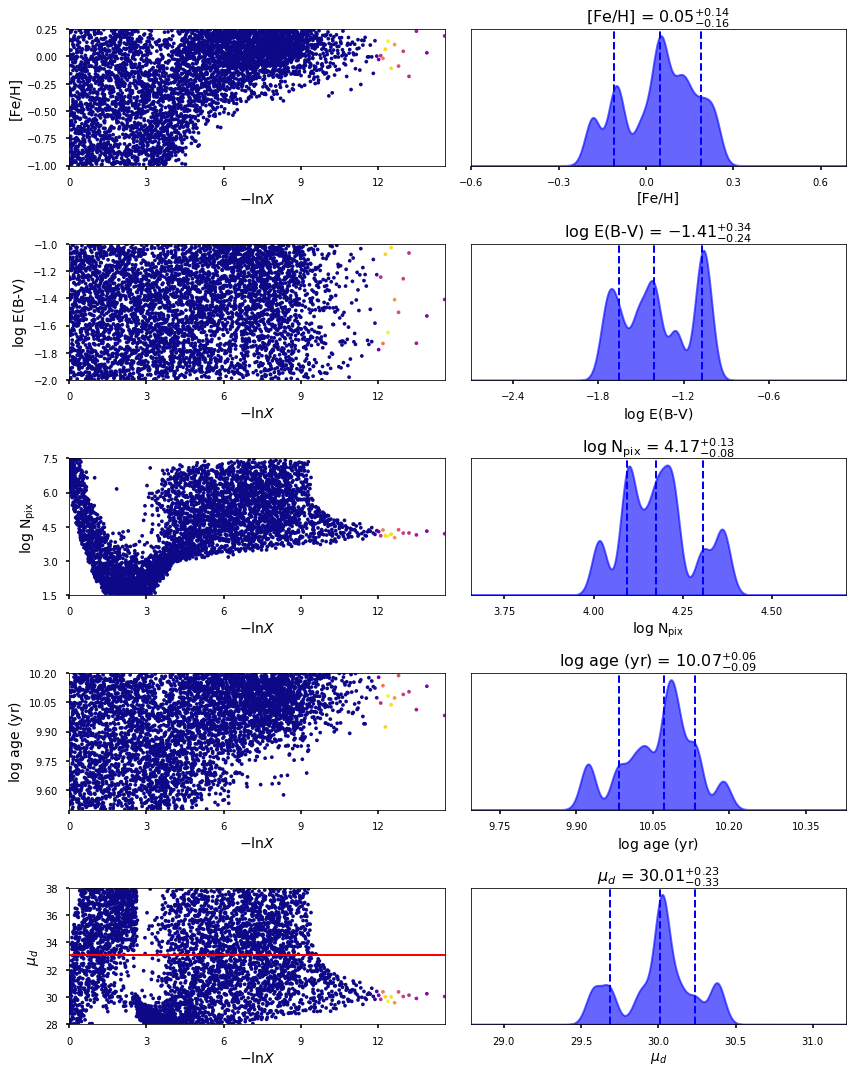

In [28]:
results['NGC4993_a1_m8'].plot_trace();

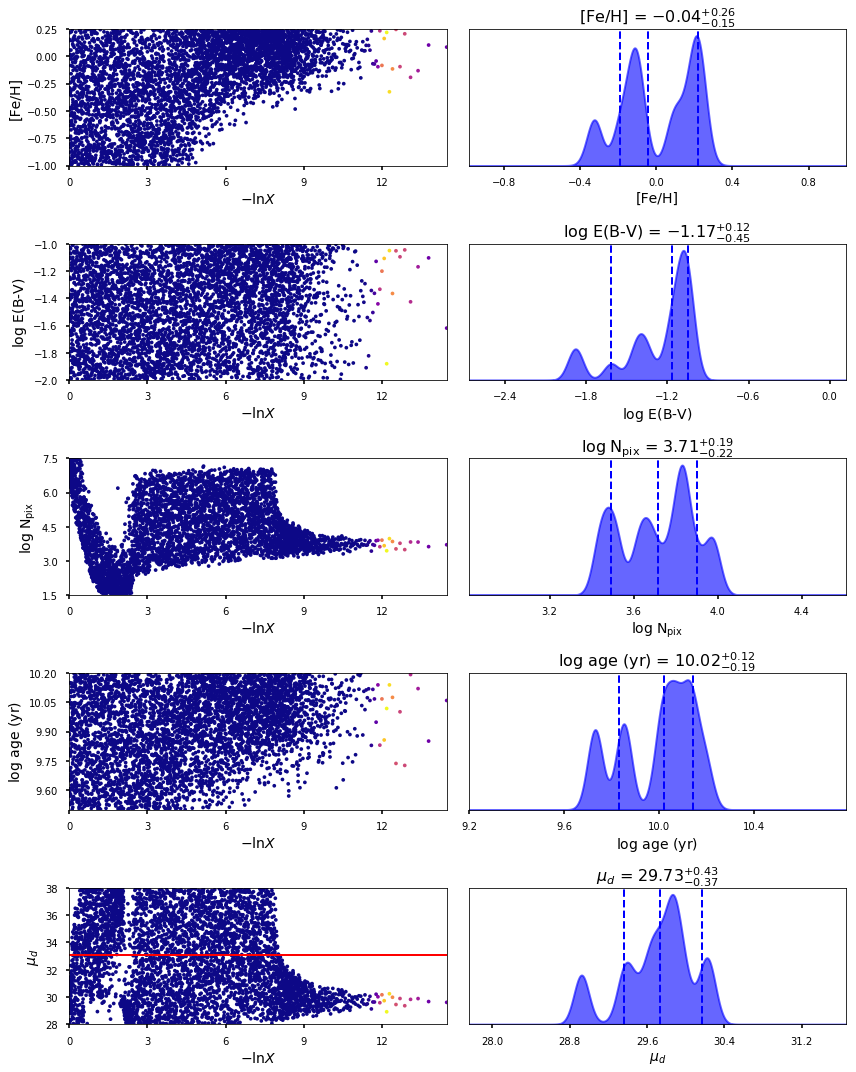

In [29]:
results['NGC4993_b1_m8'].plot_trace();

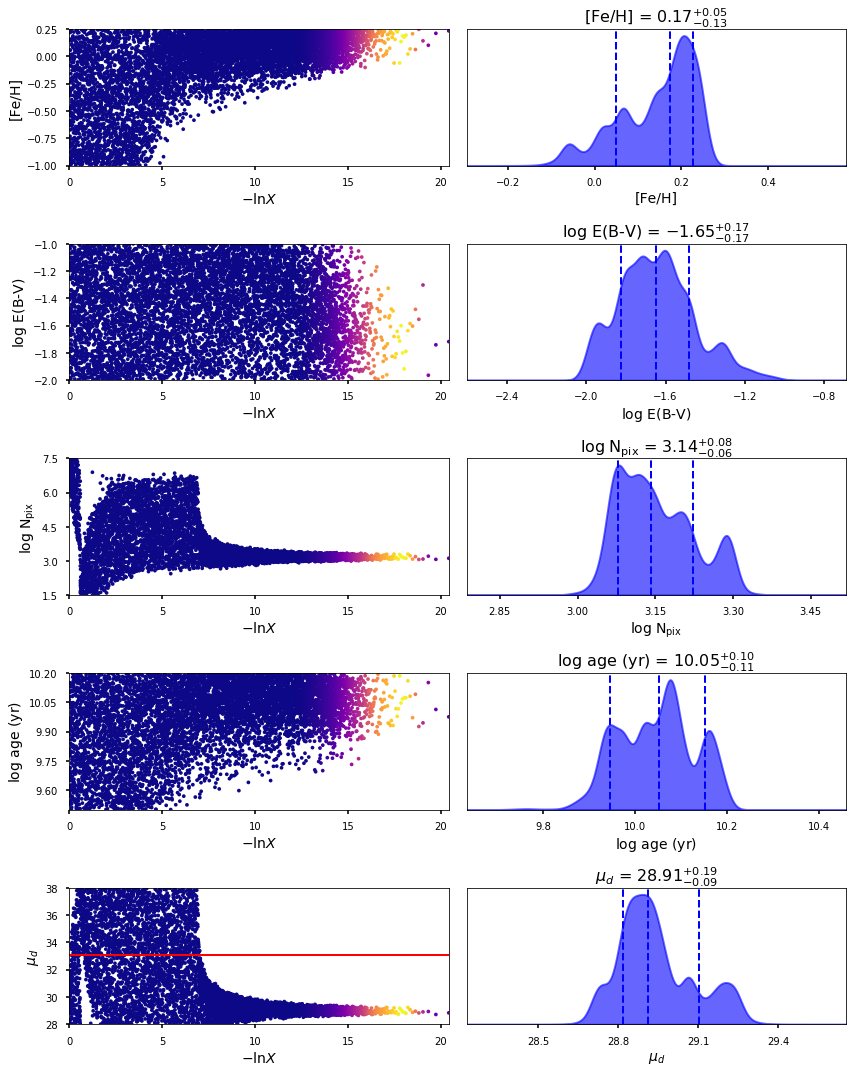

In [30]:
results['NGC4993_c1_m8'].plot_trace();

Modeling best fit for NGC4993_a1_m8
Modeling best fit for NGC4993_b1_m8
Modeling best fit for NGC4993_c1_m8


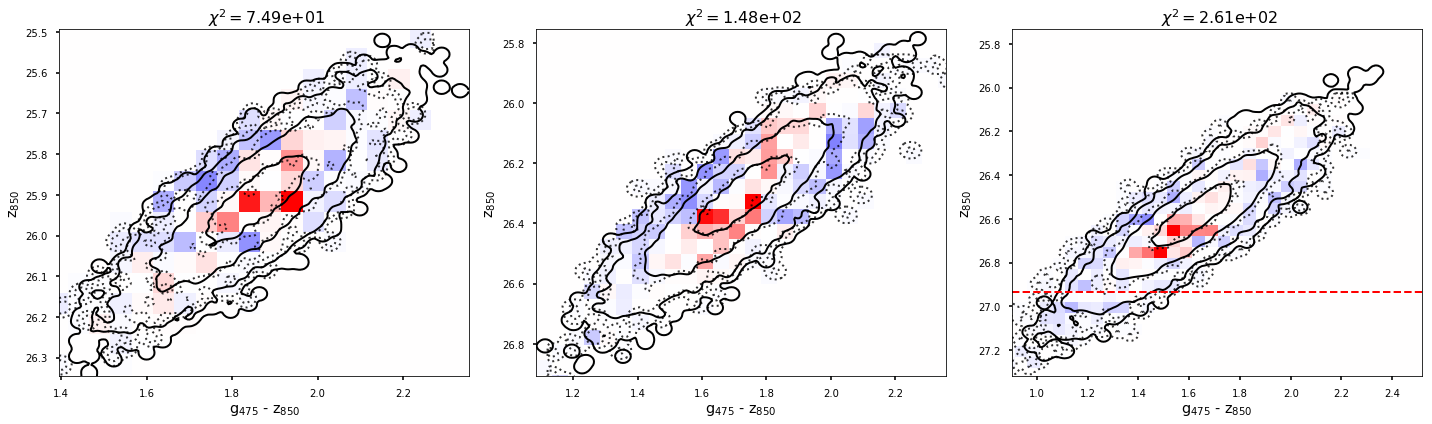

In [31]:
for k in ['NGC4993_a1_m8', 'NGC4993_b1_m8', 'NGC4993_c1_m8']:
    if k in pcmds:
        pcmds.pop(k)
fig, axes = many_pcmd_compares(['NGC4993_a1_m8', 'NGC4993_b1_m8', 'NGC4993_c1_m8'], residuals=True)
for a in axes:
    a.axhline(y=filters['NGC4993'][0].counts_to_mag(sky['NGC4993'][0]), color='r', ls='--')
#     a.set_ylim(ymin=27.4)

In [50]:
pcmd1, _ = drivers['M87v2'].simulate(results['M87v2_a1_m5'].best_model, 512, dither=False, sky_noise=sky['M87v2'])

In [51]:
pcmd2 = pcmds['M87v2_a1_m5']

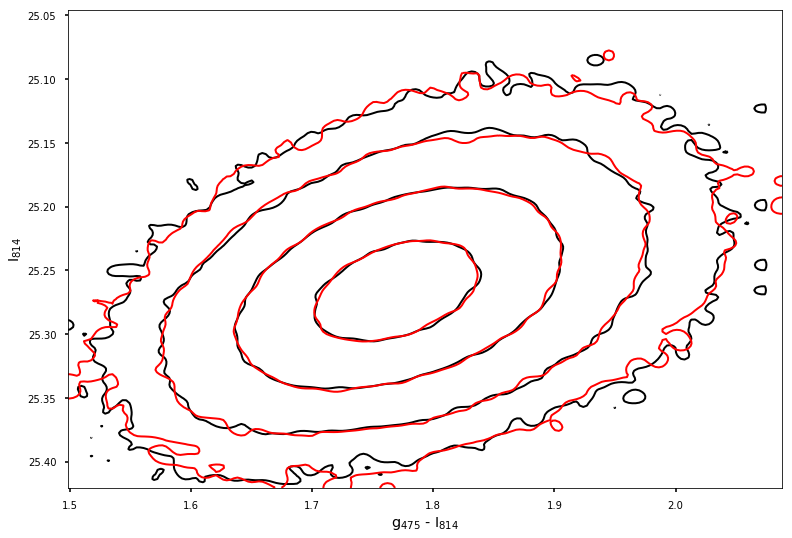

In [52]:
fig, ax = plt.subplots()
ppy.plotting.plot_pcmd_contours(pcmd1, ax=ax)
ppy.plotting.plot_pcmd_contours(pcmd2, ax=ax, color='r')
ppy.plotting.plot_isochrone(iso_models['M87v2'], alpha=0., axes=ax)

In [57]:
m._params

[0.24234, -1.2934, 4.8749, 10.2, 33.05]

In [54]:
results['NGC4993_a1_m6'].best_model._params

[0.028729, -1.3443, 4.1821, 10.163, 29.945]

In [50]:
m.logNpix

4.8749

# DF2

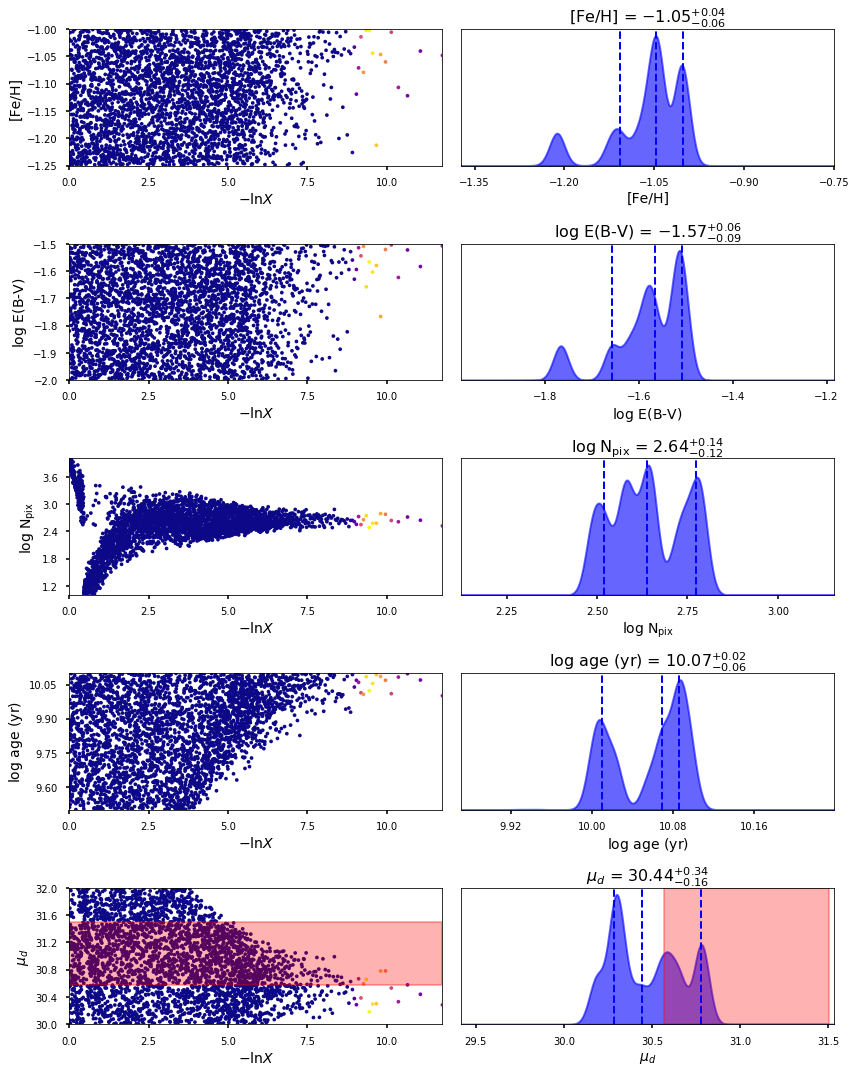

In [17]:
fig, axes = results['DF2_ssp'].plot_trace();
d20 = ppy.distancemodels.mpc_to_dmod(20.)
d13 = ppy.distancemodels.mpc_to_dmod(13.)

axes[-1,0].axhspan(d13, d20, color='r', alpha=0.3)
axes[-1,1].axvspan(d13, d20, color='r', alpha=0.3)

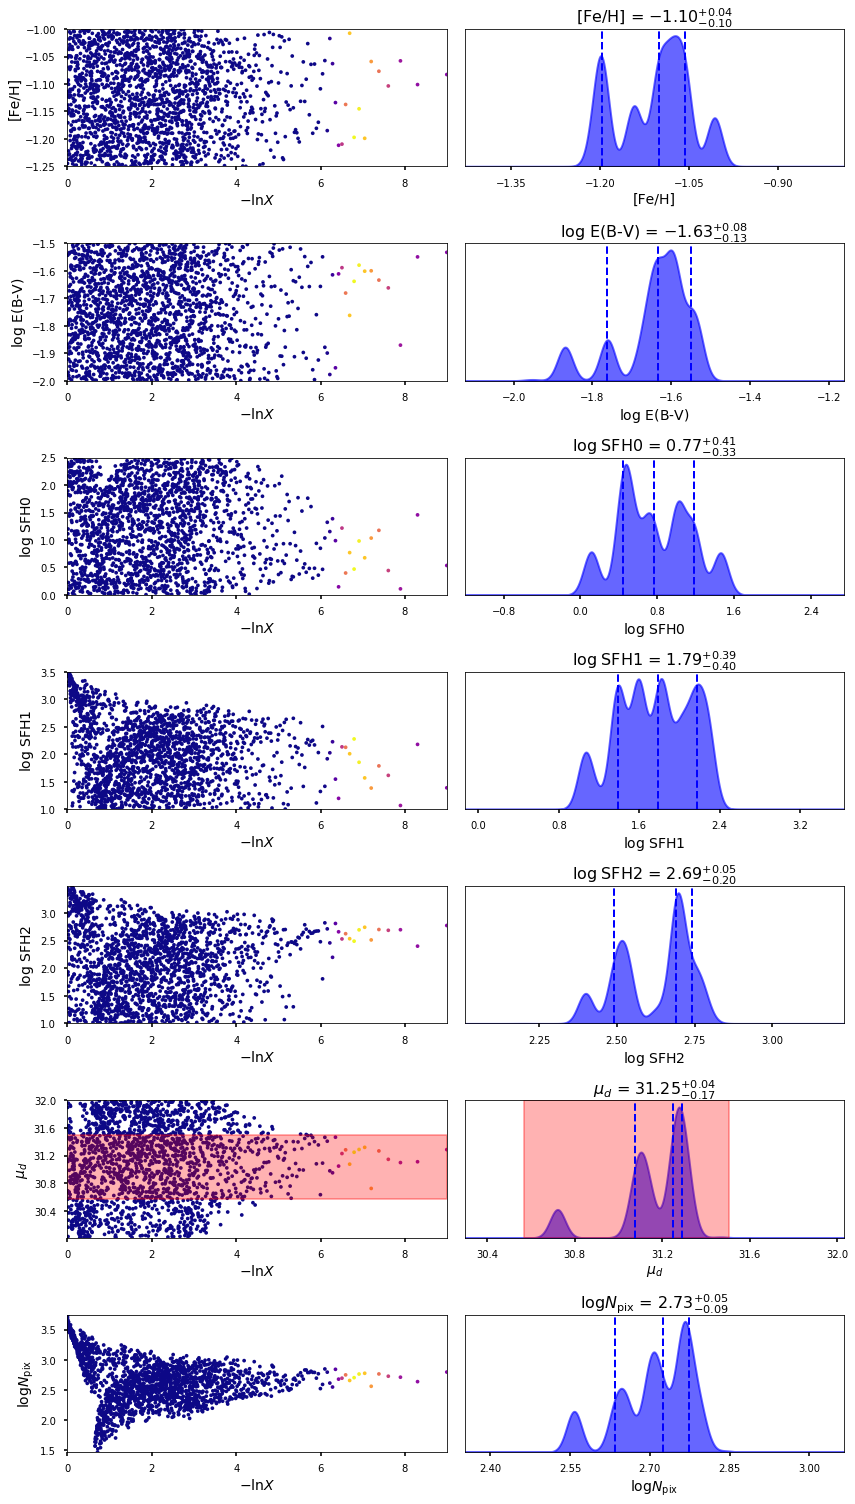

In [19]:
fig, axes = results['DF2_np'].plot_trace();
d20 = ppy.distancemodels.mpc_to_dmod(20.)
d13 = ppy.distancemodels.mpc_to_dmod(13.)

axes[-2,0].axhspan(d13, d20, color='r', alpha=0.3)
axes[-2,1].axvspan(d13, d20, color='r', alpha=0.3)